<a href="https://colab.research.google.com/github/zhenwuming99/basic_datatools/blob/main/stock%20price%20forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
#https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/

# Collecting Data

In [44]:
import os
from glob import glob
import requests
import pandas as pd
import numpy as np
import csv
import json
from IPython.display import display
from sklearn.preprocessing import StandardScaler
# get date range according to U.S. Federal Calendar 
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
import re
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [45]:
symbols = 'RY'

While closing price merely refers to the cost of shares at the end of the day, the adjusted closing price considers other factors like dividends, stock splits, and new stock offerings. Since the adjusted closing price begins where the closing price ends, it can be called a more accurate measure of stocks' value.

In [46]:
#TIME_SERIES_DAILY_ADJUSTED High Usage

#This API returns raw (as-traded) daily open/high/low/close/volume values, daily adjusted close values, and historical split/dividend events of the global equity specified, covering 20+ years of historical data.


url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={symbols}&outputsize=full&apikey=YE30K24XDU3XLX10"                
data = requests.get(url).json()
df = pd.DataFrame(data["Time Series (Daily)"]).transpose().sort_index(ascending=True)

In [47]:
df.head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
1999-11-01,43.44,43.44,43.12,43.19,5.25256120855,16400,0.0000,1.0
1999-11-02,43.0,43.12,42.62,43.0,5.22945431738,6400,0.0000,1.0
1999-11-03,42.88,43.12,42.56,42.56,5.17594362204,10600,0.0000,1.0
1999-11-04,42.75,43.12,42.44,42.5,5.16864670904,26000,0.0000,1.0
1999-11-05,42.75,43.06,42.0,42.19,5.13094599187,20600,0.0000,1.0


In [48]:
df.rename(columns={"1. open": "Open", "2. high": "High", "3. low": "Low", "4. close": "Close",
                    "5. adjusted close": "Adj Close", "6. volume": "Volume",
                    "7. dividend amount": "dividend amount", "8. split coefficient": "split coefficient"}, inplace=True)
df.drop(columns = ["dividend amount", "split coefficient"], inplace=True)
df = df.astype({"Open": "float64", "High": "float64", "Low": "float64", "Close": "float64", "Adj Close":"float64", "Volume":"int64"})
df.index = pd.to_datetime(df.index, infer_datetime_format=True)


In [49]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
1999-11-01,43.44,43.44,43.12,43.19,5.252561,16400
1999-11-02,43.00,43.12,42.62,43.00,5.229454,6400
1999-11-03,42.88,43.12,42.56,42.56,5.175944,10600
1999-11-04,42.75,43.12,42.44,42.50,5.168647,26000
1999-11-05,42.75,43.06,42.00,42.19,5.130946,20600


In [50]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5555.000000,5555.00000,5555.000000,5555.000000,5555.000000,5.555000e+03
mean,57.349057,57.79491,56.904594,57.373999,37.094128,6.841099e+05
std,16.650618,16.65868,16.641839,16.647171,23.857560,6.562890e+05
min,20.850000,22.15000,20.510000,20.620000,4.712040,8.000000e+02
25%,46.035000,46.51500,45.690000,46.160000,15.729524,1.665000e+05
50%,55.660000,56.06000,55.130000,55.570000,33.655660,5.588000e+05
75%,69.160000,69.60000,68.625000,69.125000,51.779398,9.456025e+05
max,107.310000,108.09000,107.210000,107.750000,107.060000,9.830834e+06


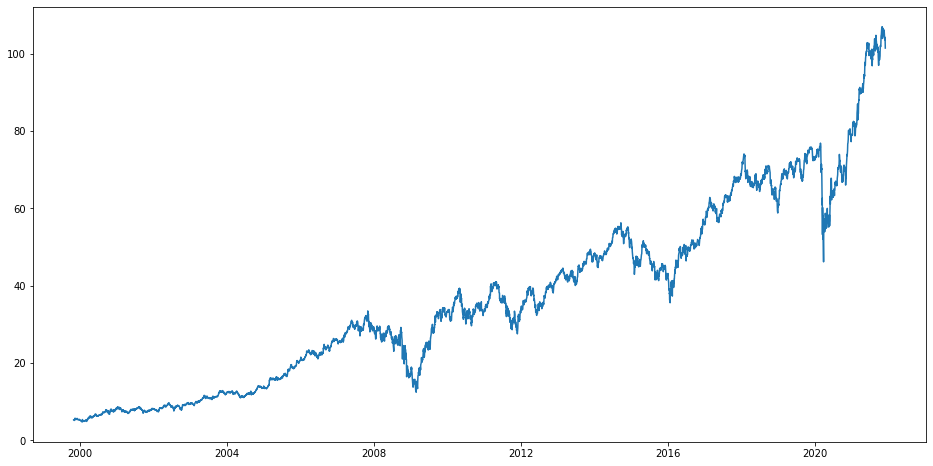

In [51]:
#https://data-flair.training/blogs/stock-price-prediction-machine-learning-project-in-python/
from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range=(0,1))
# scaled_dataset = scaler.fit_transform(df.values)

df["Date"]=pd.to_datetime(df.index,format="%Y-%m-%d")
df.index=df['Date']
plt.figure(figsize=(16,8))
plt.plot(df["Adj Close"],label='Adj Close Price history')

In [52]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5555.000000,5555.00000,5555.000000,5555.000000,5555.000000,5.555000e+03
mean,57.349057,57.79491,56.904594,57.373999,37.094128,6.841099e+05
std,16.650618,16.65868,16.641839,16.647171,23.857560,6.562890e+05
min,20.850000,22.15000,20.510000,20.620000,4.712040,8.000000e+02
25%,46.035000,46.51500,45.690000,46.160000,15.729524,1.665000e+05
50%,55.660000,56.06000,55.130000,55.570000,33.655660,5.588000e+05
75%,69.160000,69.60000,68.625000,69.125000,51.779398,9.456025e+05
max,107.310000,108.09000,107.210000,107.750000,107.060000,9.830834e+06


# 2. Model Building

In [53]:
x = df[['Open', 'High','Low', 'Volume']]
y = df['Adj Close']
# Linear regression Model for stock prediction 
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.15 , shuffle=False,random_state = 0)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(4721, 4)
(834, 4)
(4721,)
(834,)


## 2.1 Linear regression

> The model accuracy vary from differnt stocks



In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regression = LinearRegression()
regression.fit(train_x, train_y)
print("regression coefficient",regression.coef_)
print("regression intercept",regression.intercept_)

regression coefficient [ 1.12164189e+00 -3.74248355e+00  3.60888976e+00  1.03214044e-05]
regression intercept -25.657798283583002


In [55]:
predicted=regression.predict(test_x)
dfr=pd.DataFrame({'Actual_Price':test_y, 'Predicted_Price':predicted})
dfr.head(10)

,Actual_Price,Predicted_Price
Date,,
2018-08-07,67.534598,53.880207
2018-08-08,68.183885,53.770713
2018-08-09,68.561173,53.717088
2018-08-10,67.666211,53.861719
2018-08-13,67.710081,53.564744
2018-08-14,68.490980,54.012224
2018-08-15,67.753952,54.988752
2018-08-16,67.955757,54.737652
2018-08-17,69.087622,55.372749


In [56]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_y, predicted))
print('Mean Squared Error (MSE) :', metrics.mean_squared_error(test_y, predicted))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(test_y, predicted)))

Mean Absolute Error (MAE): 15.624306708745877
Mean Squared Error (MSE) : 272.23861852649014
Root Mean Squared Error (RMSE): 16.49965510325868


In [57]:
r2_score=regression.score(test_x,test_y)
print("model accuracy :",r2_score*100,'%')

model accuracy : -43.94679312378828 %


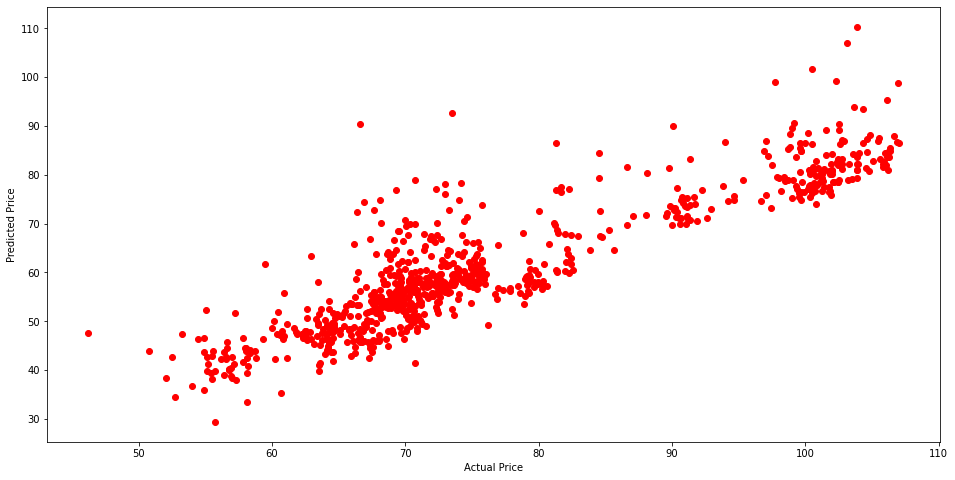

In [58]:
plt.figure(figsize=(16,8))
plt.scatter(dfr.Actual_Price, dfr.Predicted_Price, color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

No handles with labels found to put in legend.


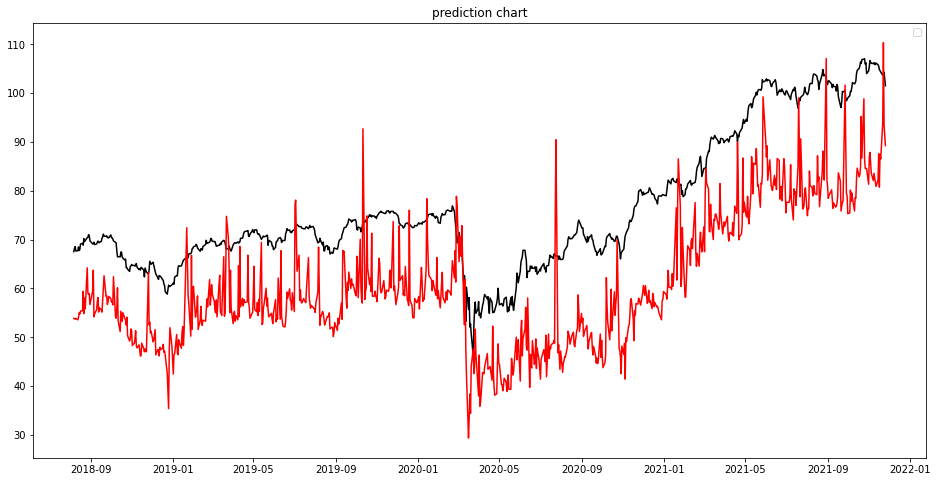

In [59]:
plt.figure(figsize=(16,8))
plt.plot(dfr.Actual_Price, color='black')
plt.plot(dfr.Predicted_Price, color='red')
plt.title("prediction chart")
plt.legend();

The stock market has been always the hottest topic when it comes to time series forecasting or trying to feel where the market is going overall. It’s impossible to find “to go to” formula to predict the direction of the stock market, because of constant volatility of the market, the uncertainty of moving variables that could impact the stock market volatility from associated risk to political instability and Macroeconomic factors, well the list could go on.
To have better visibility on where the market is going, relying on regression models and predicting certain values based on past performance is not good enough. The following points should complement a full-fledged regression model report.

## 2.2

## 2.3 The AutoRegressive Integrated Moving Average (ARIMA) 

>also vary from different stocks, especially hard to use one method to detrend the data




Time-series forecasting is widely used for non-stationary data. Non-stationary data are called the data whose statistical properties e.g. the mean and standard deviation are not constant over time but instead, these metrics vary over time.

Before building the ARIMA model, let’s see if there is some cross-correlation in out data.
We can now confirm that ARIMA is going to be a good model to be applied to this type of data (there is auto-correlation in the data).

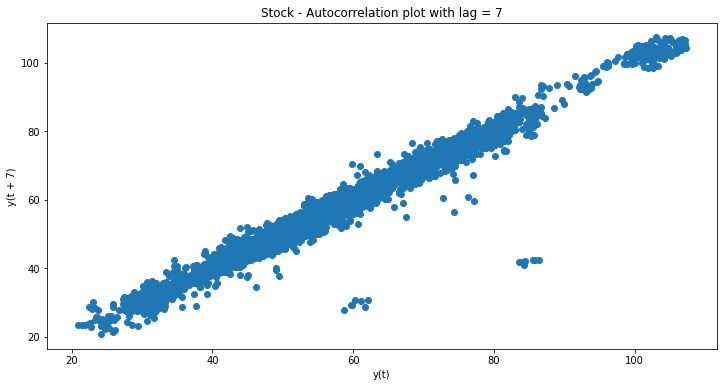

In [60]:
plt.figure(figsize=(12,6))
pd.plotting.lag_plot(df['Open'], lag=7)
plt.title('Stock - Autocorrelation plot with lag = 7')
plt.show()

Text(0, 0.5, 'price')

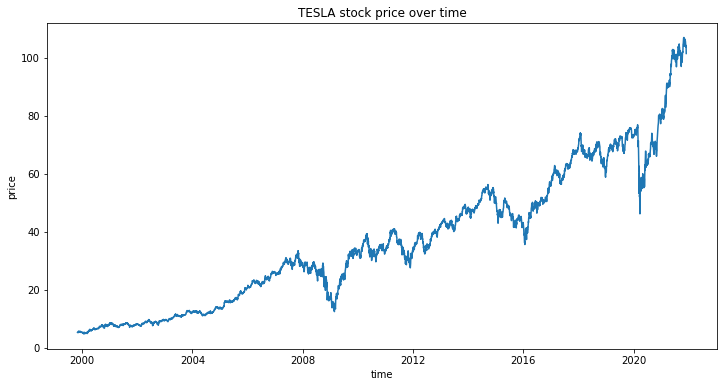

In [61]:
plt.figure(figsize=(12,6))
plt.plot(df["Adj Close"],label='Adj Close Price history')
plt.title("TESLA stock price over time")
plt.xlabel("time")
plt.ylabel("price")


### Leverage Auto ARIMA functionality
```
# 此内容为代码格式
```



In [62]:
!pip install pmdarima
from pmdarima.arima import auto_arima

In [83]:
def stationarity_check(ts):
    from statsmodels.tsa.stattools import adfuller  
    # Calculate rolling statistics
    roll_mean = ts.rolling(window=8, center=False).mean()
    roll_std = ts.rolling(window=8, center=False).std()

    # Perform the Dickey Fuller test
    dftest = adfuller(ts) 
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(ts, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results

    print('\nResults of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

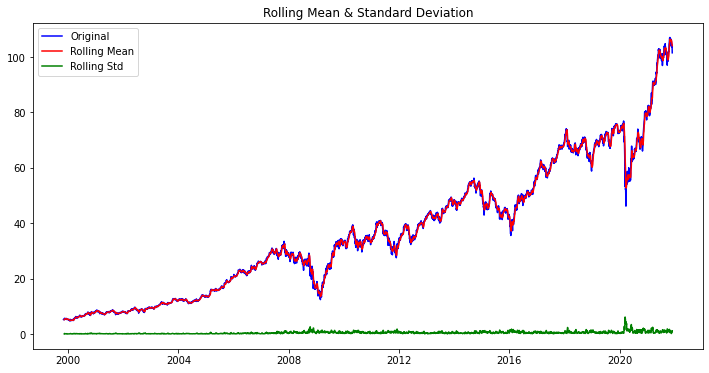


Results of Dickey-Fuller Test: 

Test Statistic                    0.598597
p-value                           0.987581
#Lags Used                        9.000000
Number of Observations Used    5545.000000
Critical Value (1%)              -3.431530
Critical Value (5%)              -2.862061
Critical Value (10%)             -2.567048
dtype: float64


In [64]:
stationarity_check(df[['Adj Close']])

The null hypothesis for the Dickey-Fuller test is that the time series is not stationary. If the test statistic is less than the critical value and the p-value is lower than alpha (usually 0.05), we reject the null hypothesis and say the series is stationary.

**Based on the out it given, p> 0.05, it suggested that we fail to reject the the data is non-stationary.**

NExt, we need to work on remove the trend, seasonality of the data 

In [65]:
tdf=df[['Adj Close']]
tdf['Date']=tdf.index
tdf.reset_index(drop=True, inplace=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [66]:
from datetime import date, timedelta
import pandas as pd

#Start date and end_date
start_date = tdf['Date'][0]
end_date = tdf['Date'][len(tdf)-1] - timedelta(days=1) #Excluding last

#List of all dates
all_date = pd.date_range(start_date, end_date, freq='d')

#Left join your main data on dates data
all_date_df = pd.DataFrame({'Date':all_date})
tdf = pd.merge(all_date_df, tdf, on='Date', how="left")
tdf.ffill(inplace=True)
tdf.head(15)

,Date,Adj Close
0,1999-11-01,5.252561
1,1999-11-02,5.229454
2,1999-11-03,5.175944
3,1999-11-04,5.168647
4,1999-11-05,5.130946
5,1999-11-06,5.130946
6,1999-11-07,5.130946
7,1999-11-08,5.138243
8,1999-11-09,5.214860
9,1999-11-10,5.244048


In [67]:
tdf.set_index(['Date'],inplace=True)

In [68]:
def decomposition_plot(ts):
    from statsmodels.tsa.seasonal import seasonal_decompose
# Apply seasonal_decompose 
    decomposition = seasonal_decompose(np.log(ts['Adj Close']))
    
# Get trend, seasonality, and residuals
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

# Plotting
    plt.figure(figsize=(12,8))
    plt.subplot(411)
    plt.plot(np.log(ts), label='Original', color='blue')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend', color='blue')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality', color='blue')
    plt.ylim(-2, 2)
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals', color='blue')
    plt.legend(loc='best')
    plt.tight_layout()

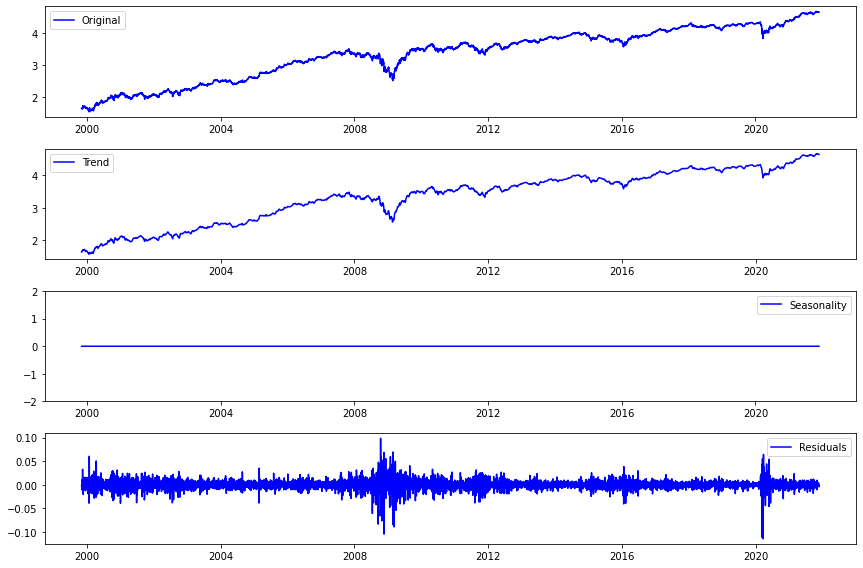

In [69]:
decomposition_plot(tdf)

#### Detrend

In [70]:
# from scipy import signal
# detrended = signal.detrend(tdf['Adj Close'].values)
# detrended_df = pd.DataFrame(detrended)
# detrended_df.plot()

## detrend only able to remove linear trend


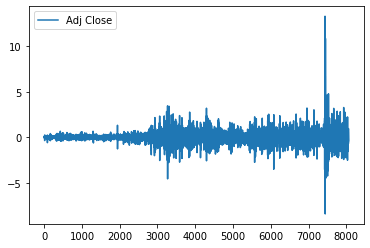

In [102]:
detrended=np.diff(np.array(tdf['Adj Close']),n=2)
detrended_df = pd.DataFrame({'Adj Close':detrended})
detrended_df.plot()

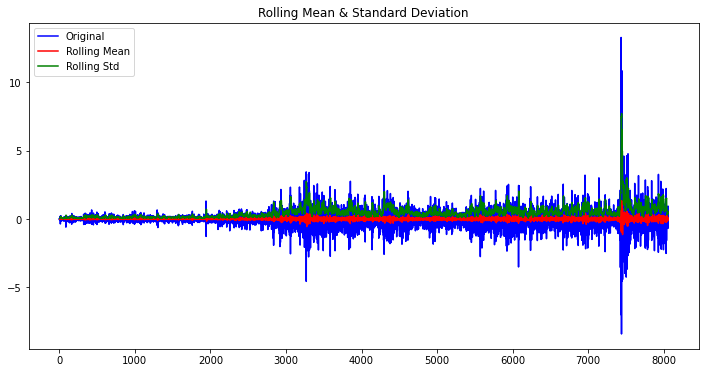


Results of Dickey-Fuller Test: 

Test Statistic                  -24.589434
p-value                           0.000000
#Lags Used                       36.000000
Number of Observations Used    8022.000000
Critical Value (1%)              -3.431165
Critical Value (5%)              -2.861900
Critical Value (10%)             -2.566962
dtype: float64


In [103]:
stationarity_check(detrended_df)

In [104]:
def plot_acf_pacf(ts, figsize=(10,8),lags=24):
    from statsmodels.graphics.tsaplots import plot_acf
    from statsmodels.graphics.tsaplots import plot_pacf
    import matplotlib as mpl
    fig,ax = plt.subplots(nrows=3, figsize=figsize)
    
    # Plot ts
    ts.plot(ax=ax[0])
    
    # Plot acf, pavf
    plot_acf(ts, ax=ax[1], lags=lags)
    plot_pacf(ts, ax=ax[2], lags=lags) 
    fig.tight_layout()
    
    for a in ax[1:]:
        a.xaxis.set_major_locator(mpl.ticker.MaxNLocator(min_n_ticks=lags, integer=True))
        a.xaxis.grid()
    return fig,ax

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


(<Figure size 720x576 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b57bdda50>,
       dtype=object))

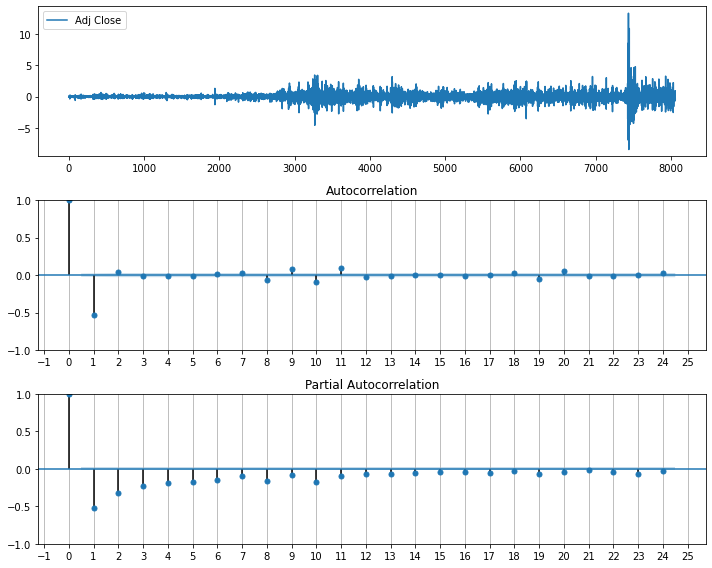

In [105]:
plot_acf_pacf(detrended_df)

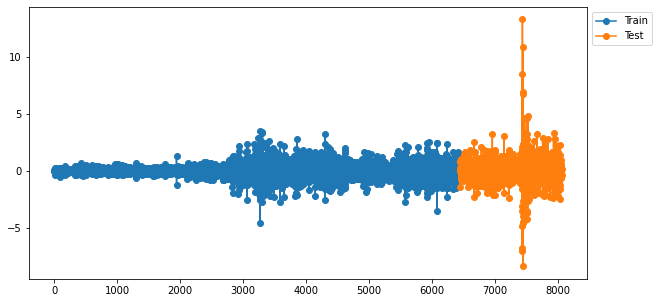

In [116]:
# Train Test Split Index
train_size = 0.8
split_idx = round(len(detrended_df)* train_size)
split_idx

# Split
train = detrended_df.iloc[:split_idx]
test = detrended_df.iloc[split_idx:]

# Visualize split
fig,ax= plt.subplots(figsize=(10,5))
kws = dict(marker='o')
plt.plot(train, label='Train', **kws)
plt.plot(test, label='Test', **kws)
ax.legend(bbox_to_anchor=[1,1]);

In [113]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [108]:
model = auto_arima(train, start_p=0, start_q=0)
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6447
Model:               SARIMAX(5, 0, 0)   Log Likelihood               -2883.655
Date:                Sat, 27 Nov 2021   AIC                           5779.310
Time:                        01:19:38   BIC                           5819.938
Sample:                             0   HQIC                          5793.368
                               - 6447                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8372      0.007   -115.665      0.000      -0.851      -0.823
ar.L2         -0.6535      0.010    -65.992      0.000      -0.673      -0.634
ar.L3         -0.4910      0.010    -48.813      0.0

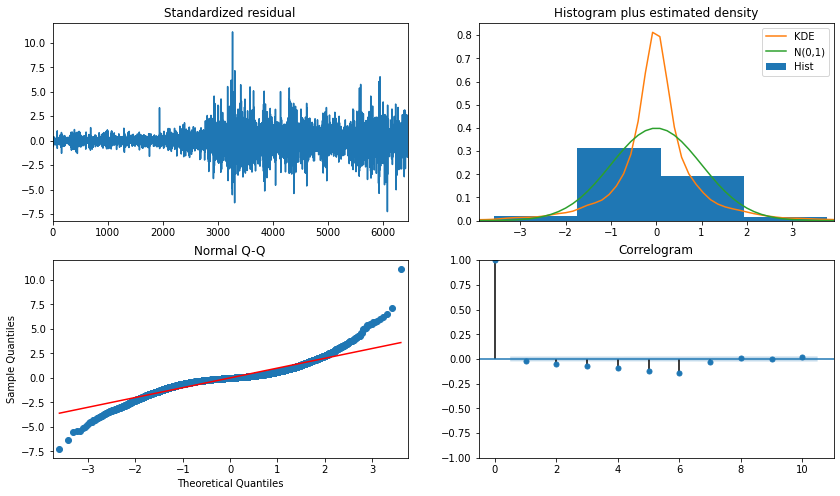

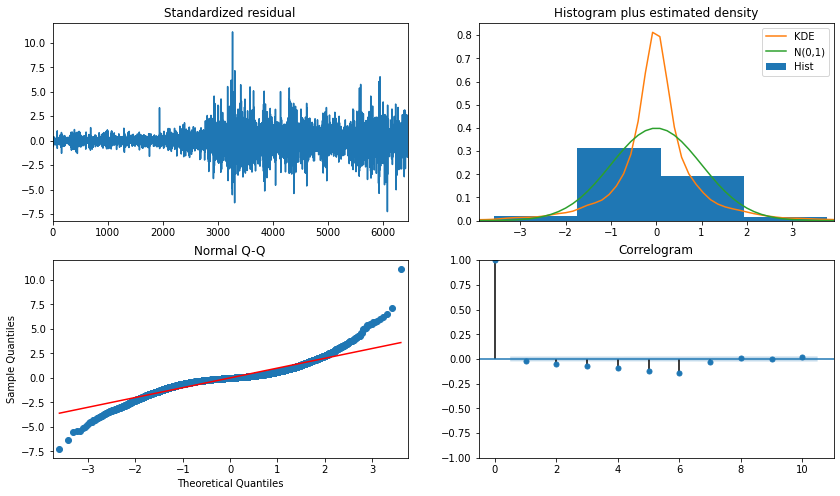

In [117]:
model.plot_diagnostics(figsize=(14,8))